<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek35.do.txt  -->
<!-- dom:TITLE: Exercises week 35 -->

# Exercises week 35
**August 28-September 1, 2023**

Date: **Deadline is Friday September 1 at midnight**

## Exercise 1: Analytical exercises

In this exercise we derive the expressions for various derivatives of
products of vectors and matrices. Such derivatives are central to the
optimization of various cost functions. Although we will often use
automatic differentiation in actual calculations, to be able to have
analytical expressions is extremely helpful in case we have simpler
derivatives as well as when we analyze various properties (like second
derivatives) of the chosen cost functions.  Vectors are always written
as boldfaced lower case letters and matrices as upper case boldfaced
letters. You will find useful the notes from week 35 on derivatives of vectors and matrices.

Show that

$$
\frac{\partial (\boldsymbol{b}^T\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{b},
$$

and

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

and

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

and finally find the second derivative of this function with respect to the vector $\boldsymbol{s}$. If we replace the vector $\boldsymbol{s}$ with the unknown parameters $\boldsymbol{\beta}$ used to define the ordinary least squares method, we end up with the equations that determine these parameters. The matrix $\boldsymbol{A}$ is then the design matrix $\boldsymbol{X}$ and $\boldsymbol{x}$ here has to be replaced with the outputs $\boldsymbol{y}$.

The second derivative of the mean squared error is then proportional to the so-called Hessian matrix $\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}$.

**Hint**: In these exercises it is always useful to write out with summation indices the various quantities.
As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Réponses

Pour
$$
\frac{\partial (\boldsymbol{b}^T\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{b},
$$
on peut montrer que
$$
\boldsymbol{b}^T\boldsymbol{a} = \sum_{i=1}^{n} b_i a_i
$$

$$
\frac{\partial}{\partial a_i} (b_i a_i) = b_i
$$

Ensuite, on peut tout écrire sous forme de vecteur

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in
[0,1]$ and defined by random numbers computed with the uniform
distribution. The function $y$ is a quadratic polynomial in $x$ with
added stochastic noise according to the normal distribution $\cal
{N}(0,1)$.  The following simple Python instructions define our $x$
and $y$ values (with 100 data points).

In [27]:
import numpy as np
x = np.random.rand(100,1)
x=np.sort(x, axis=0)
yn=0.1*np.random.randn(100,1)
y = 2.0+5*x*x+yn
x=np.reshape(x, (100,))
y=np.reshape(y, (100,))
yn=np.reshape(yn, (100,))

1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 

2. Use thereafter **scikit-learn** (see again the examples in the slides for week 35) and compare with your own code. Note here that **scikit-learn** does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept. 

3. Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.  

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).
Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
np.random.seed()
n = 35
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [29]:
x1=x.reshape(n,)
X = np.ones((len(x),6))
X[:,0] = 1.0
X[:,1] = x1
X[:,2] = x1**2
X[:,3] = x1**3
X[:,4] = x1**4
X[:,5] = x1**5

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.  If you compare your own code with _scikit_learn_, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [31]:
#fitting
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)

#prediction
ytilde = X_train @ beta
ypredict = X_test @ beta

#test
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

[[ 0.90674331]
 [ 0.32460039]
 [-0.06866248]
 [ 0.05560897]
 [ 0.00210643]
 [-0.01031988]]
Training R2
0.9403790441324186
Training MSE
0.018227388231188555
Test R2
0.12608855631828808
Test MSE
0.08984771319040541


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

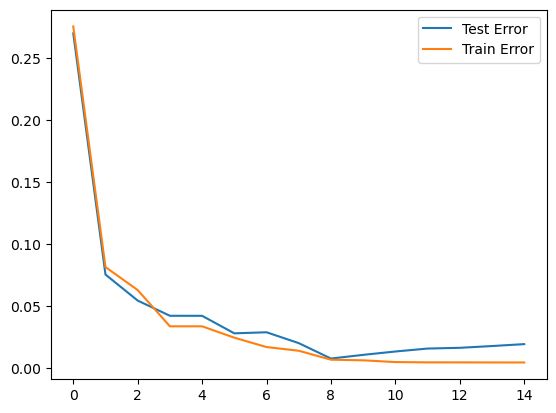

In [32]:
maxdegree = 15
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train,y_train)
    y_fit = clf.predict(x_train)
    y_pred = clf.predict(x_test) 
    polydegree[degree] = degree
    TestError[degree] = MSE(y_test, y_pred)
    TrainError[degree] = MSE(y_train, y_fit)

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()
    

## Exercise 2

In [3]:
X = np.ones((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
beta = (np.linalg.inv(X.T @ X) @ X.T ) @ y
ytilde = X @ beta
ownpoly2_plot=plt.plot(x, ytilde, label='Square Fit')
plt.plot(x,yn, color='red', label="True Square")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (100,1) into shape (100,)

In [4]:
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x[:,np.newaxis])
clf2 = LinearRegression()
clf2.fit(X,y)

Xplot=poly2.fit_transform(x[:,np.newaxis])
poly2_plot=plt.plot(x, clf2.predict(Xplot), label='Square Fit')
plt.plot(x,yn, color='red', label="True Square")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [5]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print('R2')
print(R2(y, ytilde))
print('MSE')
print(MSE(y, ytilde))

R2


NameError: name 'ytilde' is not defined

## Exercice 3